In [86]:
%matplotlib inline
import pandas as pd
import requests 
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

oscar_movie_db = pd.read_csv('../DataSources/Oscars1934-2015.csv')
oscar_movie_db.head()


,Year,Ceremony,Award,Winner,Name,Film
0,1934,7,Actor,1,Clark Gable,It Happened One Night
1,1934,7,Actor,0,Frank Morgan,The Affairs of Cellini
2,1934,7,Actor,0,William Powell,The Thin Man
3,1934,7,Actress,1,Claudette Colbert,It Happened One Night
4,1934,7,Actress,0,Bette Davis,Of Human Bondage


In [87]:
tmdb_info = pd.read_csv('../DataSources/all_tmbd_movie_info.csv')
tmdb_info.head()

,Year,Ceremony,Award,Winner,Name,Film,Revenue,Budget,Runtime,Vote_average_list,Vote_count,Popularity,Genre
0,1944,17,Best Motion Picture,0,Double Indemnity,Paramount,2500000,927262,107,8.2,640,10.652,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
1,1944,17,Best Motion Picture,0,Gaslight,Metro-Goldwyn-Mayer,0,2068000,114,7.4,118,5.320,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na..."
2,1944,17,Best Motion Picture,1,Going My Way,Paramount,16300000,0,130,7.1,51,5.407,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
3,1944,17,Best Motion Picture,0,Since You Went Away,Selznick International Pictures,0,0,172,6.3,10,0.763,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
4,1944,17,Best Motion Picture,0,Wilson,20th Century-Fox,2000000,2995000,154,5.5,6,0.600,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ..."


In [88]:
omdb_losers = pd.read_csv('../DataSources/theLosersDF_OMBD.csv')
omdb_winners = pd.read_csv('../DataSources/theWinnersDF_OMBD.csv')
omdb_nominee = pd.read_csv('../DataSources/theMoviesDF_OMBD.csv')

omdb_nominee


,Actors,Awards,Box Office,Country,Director,Genre,Rated,Title,Writer(s),Year,imdbRating
0,"Fred MacMurray, Barbara Stanwyck, Edward G. Ro...",Nominated for 7 Oscars. Another 2 wins & 2 nom...,NaN,USA,Billy Wilder,"Crime, Drama, Film-Noir",PASSED,Double Indemnity,"Billy Wilder (screenplay), Raymond Chandler (s...",1944,8.3
1,"Charles Boyer, Ingrid Bergman, Joseph Cotten, ...",Won 2 Oscars. Another 3 wins & 7 nominations.,NaN,USA,George Cukor,"Crime, Drama, Mystery",NOT RATED,Gaslight,"John Van Druten (screenplay), Walter Reisch (s...",1944,7.8
2,"Bing Crosby, Barry Fitzgerald, Frank McHugh, J...",Won 7 Oscars. Another 11 wins & 4 nominations.,NaN,USA,Leo McCarey,"Comedy, Drama, Music",PASSED,Going My Way,"Frank Butler (screenplay), Frank Cavett (scree...",1944,7.2
3,"Claudette Colbert, Jennifer Jones, Joseph Cott...",Won 1 Oscar. Another 8 nominations.,NaN,USA,"John Cromwell, Edward F. Cline, Tay Garnett, D...","Drama, Romance, War",APPROVED,Since You Went Away,"Margaret Buell Wilder (book), Margaret Buell W...",1944,7.6
4,"Woody Harrelson, Sandy Oian-Thomas, Shaun Brow...",1 nomination.,"$652,997",USA,Craig Johnson,"Comedy, Drama",R,Wilson,"Daniel Clowes (graphic novel), Daniel Clowes (...",2017,5.8
5,"Frank Sinatra, Kathryn Grayson, Gene Kelly, Jo...",Won 1 Oscar. Another 4 nominations.,NaN,USA,George Sidney,"Comedy, Fantasy, Musical",PASSED,Anchors Aweigh,"Isobel Lennart (screen play), Natalie Marcin (...",1945,7.2
6,"Bing Crosby, Ingrid Bergman, Henry Travers, Wi...",Won 1 Oscar. Another 3 wins & 7 nominations.,NaN,USA,Leo McCarey,Drama,UNRATED,The Bells of St. Mary's,"Dudley Nichols (screenplay), Leo McCarey (story)",1945,7.4
7,"Ray Milland, Jane Wyman, Phillip Terry, Howard...",Won 4 Oscars. Another 12 wins & 3 nominations.,NaN,USA,Billy Wilder,"Drama, Film-Noir",NOT RATED,The Lost Weekend,"Charles R. Jackson (from the novel by), Charle...",1945,8.0
8,"Joan Crawford, Jack Carson, Zachary Scott, Eve...",Won 1 Oscar. Another 2 wins & 6 nominations.,NaN,USA,Michael Curtiz,"Crime, Drama, Film-Noir, Mystery, Romance",PASSED,Mildred Pierce,"Ranald MacDougall (screenplay), James M. Cain ...",1945,8.0
9,"Ingrid Bergman, Gregory Peck, Michael Chekhov,...",Won 1 Oscar. Another 1 win & 6 nominations.,NaN,USA,Alfred Hitchcock,"Film-Noir, Mystery, Romance, Thriller",NOT RATED,Spellbound,"Ben Hecht (screen play), John Palmer (suggeste...",1945,7.6


In [89]:
winningImdbRating = omdb_winners['imdbRating']
winningImdbRating
imdbYearWinners = omdb_winners['Year']
imdbYearWinners

losersImdbRating = omdb_losers['imdbRating']
losersImdbRating

imdbYearLosers = omdb_losers['Year']
#imdbYearLosers


In [90]:
#winningImdbRating
#losersImdbRating
#imdbYearWinners

In [91]:
winningImdbRating
losersImdbRating
imdbYear


plt.figure(figsize=(15,5))
winningPlot = plt.scatter(imdbYearWinners, winningImdbRating, color="yellow", label="Winners", alpha=".6", edgecolors= "black", s=100)
losersPlot = plt.scatter(imdbYearLosers, losersImdbRating, color="lightblue", label="Losers", alpha=".6", edgecolors= "black", s=100)


plt.xlabel('Year', size=20)
plt.ylabel('IMDB Rating', size=20)
plt.title('Best Picture Winners and Losers by IMDB Score', size=30)
legend = plt.legend(title="Winners and Losers", loc='best')
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.savefig("bestPictureIMDBscore.png")
plt.show()

NameError: name 'imdbYear' is not defined

In [92]:
db = pd.read_csv('../DataSources/all_tmbd_movie_info.csv')
db

tmdb_info['Popularity']
tmdb_info['Year']

db['Winner'].unique()


array([0, 1])

In [93]:
tmdbWinnersDF = tmdb_info[tmdb_info['Winner'] == 1]
tmdbLosersDF = tmdb_info[tmdb_info['Winner'] == 0]
tmdbLosersDF
tmdbWinnersDF

tmdbWinnersYear = tmdbWinnersDF['Year']
tmdbLosersYear = tmdbLosersDF['Year']

tmdbWinnersPopularity = tmdbWinnersDF['Popularity']
tmdbLosersPopularity = tmdbLosersDF['Popularity']


tmdbWinnersDF

,Year,Ceremony,Award,Winner,Name,Film,Revenue,Budget,Runtime,Vote_average_list,Vote_count,Popularity,Genre
2,1944,17,Best Motion Picture,1,Going My Way,Paramount,16300000,0,130,7.1,51,5.407,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
7,1945,18,Best Motion Picture,1,The Lost Weekend,Paramount,11000000,1250000,101,7.6,184,5.335,"[{'id': 18, 'name': 'Drama'}]"
10,1946,19,Best Motion Picture,1,The Best Years of Our Lives,Samuel Goldwyn Productions,23650000,2100000,172,7.8,206,8.338,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
17,1947,20,Best Motion Picture,1,Gentleman's Agreement,20th Century-Fox,7800000,2000000,118,7.3,72,4.506,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
20,1948,21,Best Motion Picture,1,Hamlet,J. Arthur Rank-Two Cities Films,0,750000,155,7.6,76,4.285,"[{'id': 18, 'name': 'Drama'}]"
25,1949,22,Best Motion Picture,1,All the King's Men,Robert Rossen Productions,0,0,109,7.1,65,6.138,"[{'id': 18, 'name': 'Drama'}]"
30,1950,23,Best Motion Picture,1,All about Eve,20th Century-Fox,63463,1400000,139,8.2,575,9.223,"[{'id': 18, 'name': 'Drama'}]"
35,1951,24,Best Motion Picture,1,An American in Paris,"Arthur Freed, Producer",4500000,2723903,113,7.0,210,6.571,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."
40,1952,25,Best Motion Picture,1,The Greatest Show on Earth,"Cecil B. DeMille, Producer",36000000,4000000,152,6.4,76,5.204,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45,1953,26,Best Motion Picture,1,From Here to Eternity,"Buddy Adler, Producer",30500000,1650000,118,7.4,216,6.628,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."


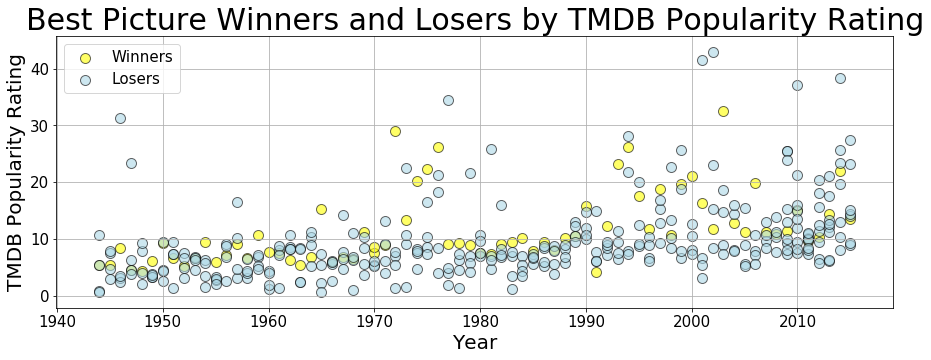

In [94]:
plt.figure(figsize=(15,5))
winningRatingPlot = plt.scatter(tmdbWinnersYear, tmdbWinnersPopularity, color="yellow", label="Winners", alpha=".6", edgecolors= "black", s=100)
losersRatingPlot = plt.scatter(tmdbLosersYear, tmdbLosersPopularity, color="lightblue", label="Losers", alpha=".6", edgecolors= "black", s=100)


plt.xlabel('Year', size=20)
plt.ylabel('TMDB Popularity Rating', size=20)
plt.title('Best Picture Winners and Losers by TMDB Popularity Rating', size=30)
legend = plt.legend(title="Winners and Losers", loc='best')
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.savefig("bestPictureImdbPopularityRating.png")
plt.show()

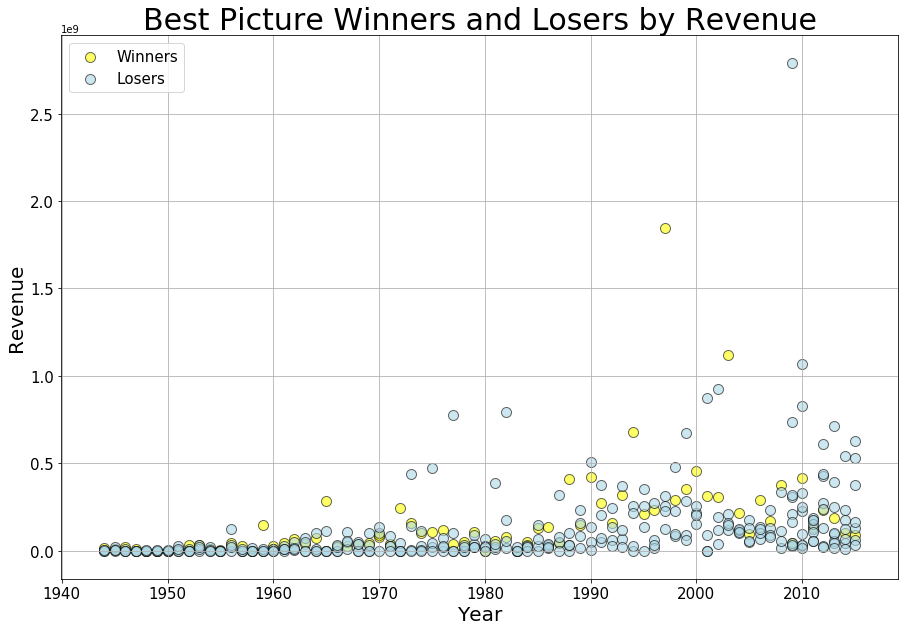

In [95]:
tmdbWinnersRevenue = tmdbWinnersDF['Revenue']
tmdbLosersRevenue = tmdbLosersDF['Revenue']


tmdbWinnersDF

plt.figure(figsize=(15,10))
winningRevenuePlot = plt.scatter(tmdbWinnersYear, tmdbWinnersRevenue, color="yellow", label="Winners", alpha=".6", edgecolors= "black", s=100)
losersRevenuePlot = plt.scatter(tmdbLosersYear, tmdbLosersRevenue, color="lightblue", label="Losers", alpha=".6", edgecolors= "black", s=100)


plt.xlabel('Year', size=20)
plt.ylabel('Revenue', size=20)
plt.title('Best Picture Winners and Losers by Revenue', size='30')
legend = plt.legend(title="Winners and Losers", loc='best')
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(fontsize = 15)
plt.grid(True)
plt.savefig("bestPictureRevenue.png")
plt.show()


In [96]:
omdb_nominee

,Actors,Awards,Box Office,Country,Director,Genre,Rated,Title,Writer(s),Year,imdbRating
0,"Fred MacMurray, Barbara Stanwyck, Edward G. Ro...",Nominated for 7 Oscars. Another 2 wins & 2 nom...,NaN,USA,Billy Wilder,"Crime, Drama, Film-Noir",PASSED,Double Indemnity,"Billy Wilder (screenplay), Raymond Chandler (s...",1944,8.3
1,"Charles Boyer, Ingrid Bergman, Joseph Cotten, ...",Won 2 Oscars. Another 3 wins & 7 nominations.,NaN,USA,George Cukor,"Crime, Drama, Mystery",NOT RATED,Gaslight,"John Van Druten (screenplay), Walter Reisch (s...",1944,7.8
2,"Bing Crosby, Barry Fitzgerald, Frank McHugh, J...",Won 7 Oscars. Another 11 wins & 4 nominations.,NaN,USA,Leo McCarey,"Comedy, Drama, Music",PASSED,Going My Way,"Frank Butler (screenplay), Frank Cavett (scree...",1944,7.2
3,"Claudette Colbert, Jennifer Jones, Joseph Cott...",Won 1 Oscar. Another 8 nominations.,NaN,USA,"John Cromwell, Edward F. Cline, Tay Garnett, D...","Drama, Romance, War",APPROVED,Since You Went Away,"Margaret Buell Wilder (book), Margaret Buell W...",1944,7.6
4,"Woody Harrelson, Sandy Oian-Thomas, Shaun Brow...",1 nomination.,"$652,997",USA,Craig Johnson,"Comedy, Drama",R,Wilson,"Daniel Clowes (graphic novel), Daniel Clowes (...",2017,5.8
5,"Frank Sinatra, Kathryn Grayson, Gene Kelly, Jo...",Won 1 Oscar. Another 4 nominations.,NaN,USA,George Sidney,"Comedy, Fantasy, Musical",PASSED,Anchors Aweigh,"Isobel Lennart (screen play), Natalie Marcin (...",1945,7.2
6,"Bing Crosby, Ingrid Bergman, Henry Travers, Wi...",Won 1 Oscar. Another 3 wins & 7 nominations.,NaN,USA,Leo McCarey,Drama,UNRATED,The Bells of St. Mary's,"Dudley Nichols (screenplay), Leo McCarey (story)",1945,7.4
7,"Ray Milland, Jane Wyman, Phillip Terry, Howard...",Won 4 Oscars. Another 12 wins & 3 nominations.,NaN,USA,Billy Wilder,"Drama, Film-Noir",NOT RATED,The Lost Weekend,"Charles R. Jackson (from the novel by), Charle...",1945,8.0
8,"Joan Crawford, Jack Carson, Zachary Scott, Eve...",Won 1 Oscar. Another 2 wins & 6 nominations.,NaN,USA,Michael Curtiz,"Crime, Drama, Film-Noir, Mystery, Romance",PASSED,Mildred Pierce,"Ranald MacDougall (screenplay), James M. Cain ...",1945,8.0
9,"Ingrid Bergman, Gregory Peck, Michael Chekhov,...",Won 1 Oscar. Another 1 win & 6 nominations.,NaN,USA,Alfred Hitchcock,"Film-Noir, Mystery, Romance, Thriller",NOT RATED,Spellbound,"Ben Hecht (screen play), John Palmer (suggeste...",1945,7.6


In [97]:
finalMovieQualDB = pd.read_csv('../DataSources/theMovies_qual2.csv')
finalMovieDB = pd.read_csv('../DataSources/theMovies2.csv')
finalMovieDB


,Title,Best Picture,Prod Company,Year,imdbRating,Popularity,Rated_APPROVED,Rated_G,Rated_PG,Rated_PG-13,...,Genre_Short,Genre_Sport,Genre_Thriller,Genre_War,Genre_Western,Best Actor,Best Actress,Best Director,Best Supporting Actor,Best Supporting Actress
0,Double Indemnity,0,Paramount,1944,8.3,11.853,1,0,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0
1,Gaslight,0,Metro-Goldwyn-Mayer,1944,7.8,6.868,0,0,0,0,...,0,0,1,0,0,0.0,1.0,0.0,0.0,0.0
2,Going My Way,1,Paramount,1944,7.2,3.592,1,0,0,0,...,0,0,0,0,0,1.0,0.0,1.0,1.0,0.0
3,Since You Went Away,0,Selznick International Pictures,1944,7.6,1.400,1,0,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0
4,Wilson,0,20th Century-Fox,1944,5.8,0.771,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
5,Anchors Aweigh,0,Metro-Goldwyn-Mayer,1945,7.2,4.672,1,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
6,The Bells of St. Mary's,0,Rainbow Productions,1945,7.4,2.620,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
7,The Lost Weekend,1,Paramount,1945,8.0,5.871,0,0,0,0,...,0,0,0,0,0,1.0,0.0,1.0,0.0,0.0
8,Mildred Pierce,0,Warner Brothers,1945,8.0,6.637,1,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
9,Spellbound,0,Selznick International Pictures,1945,7.6,8.192,0,0,0,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0


In [98]:
winningGenres = finalMovieQualDB['Rated'].unique()
genreWins = omdb_winners['Rated'].value_counts()
genreWinsIndex = omdb_winners['Rated'].value_counts().index



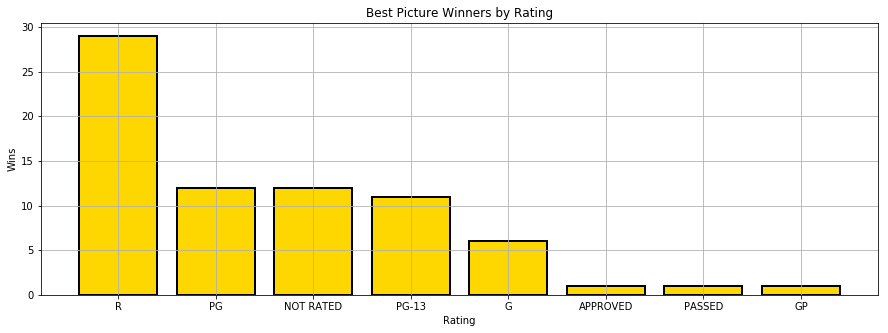

In [99]:
RatingWins = omdb_winners['Rated'].value_counts()
RatingWinsIndex = omdb_winners['Rated'].value_counts().index


plt.figure(figsize=(15,5))
winningGenrePlot = plt.bar(genreWinsIndex, genreWins, color = "gold", edgecolor = "black", linewidth = 2)

plt.xlabel('Rating')
plt.ylabel('Wins')
plt.title('Best Picture Winners by Rating')

plt.grid(True)
#plt.savefig("pyberRidesDots.png")
plt.show()

#genreWins


In [140]:
genreWins

R            29
PG           12
NOT RATED    12
PG-13        11
G             6
APPROVED      1
PASSED        1
GP            1
Name: Rated, dtype: int64

In [149]:
finalMovieQualDB = pd.read_csv('../DataSources/theMovies_qual2.csv')
nomineeRatings = finalMovieQualDB['Rated'].value_counts()
nomineeRatings

R           134
PG           74
PG-13        67
UNRATED      60
G            22
APPROVED     20
0             7
Name: Rated, dtype: int64

In [146]:
winnerDF = finalMovieQualDB[finalMovieQualDB['Best Picture'] == 1]
winnerRatings

R           29
PG          13
UNRATED     12
PG-13       11
G            6
APPROVED     2
Name: Rated, dtype: int64

In [150]:
RatingPercent = {
    'R' : winnerRatings[0] / nomineeRatings[0] * 100,
    'PG' : winnerRatings[1] / nomineeRatings[1] * 100,
    'UNRATED' : winnerRatings[2] / nomineeRatings[2] * 100,
    'PG-13' : winnerRatings[3] / nomineeRatings[3] * 100,
    'G' : winnerRatings[4] / nomineeRatings[4] * 100,
    'APPROVED' : winnerRatings[5] / nomineeRatings[5] * 100}
RatingPercent

{'R': 21.641791044776117,
 'PG': 17.56756756756757,
 'UNRATED': 17.91044776119403,
 'PG-13': 18.333333333333332,
 'G': 27.27272727272727,
 'APPROVED': 10.0}

In [161]:
RatingPercent

{'R': 21.641791044776117,
 'PG': 17.56756756756757,
 'UNRATED': 17.91044776119403,
 'PG-13': 18.333333333333332,
 'G': 27.27272727272727,
 'APPROVED': 10.0}

In [159]:
nomineeRatings



R           134
PG           74
PG-13        67
UNRATED      60
G            22
APPROVED     20
0             7
Name: Rated, dtype: int64

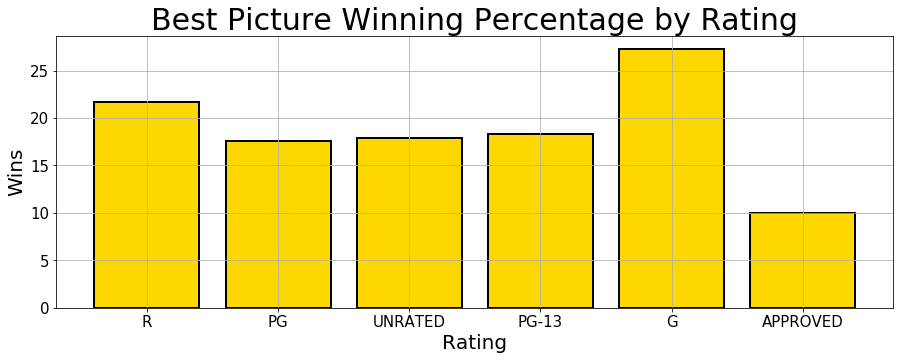

In [166]:


plt.figure(figsize=(15,5))
winningGenrePlot = plt.bar(RatingPercent.keys(), RatingPercent.values(), color = "gold", edgecolor = "black", linewidth = 2)


plt.xlabel('Rating', size=20)
plt.ylabel('Wins', size=20)
plt.title('Best Picture Winning Percentage by Rating', size=30)

plt.xticks(size=15)
plt.yticks(size=15)

plt.grid(True)
plt.savefig("winningPercentageRATING.png")
plt.show()

#genreWins

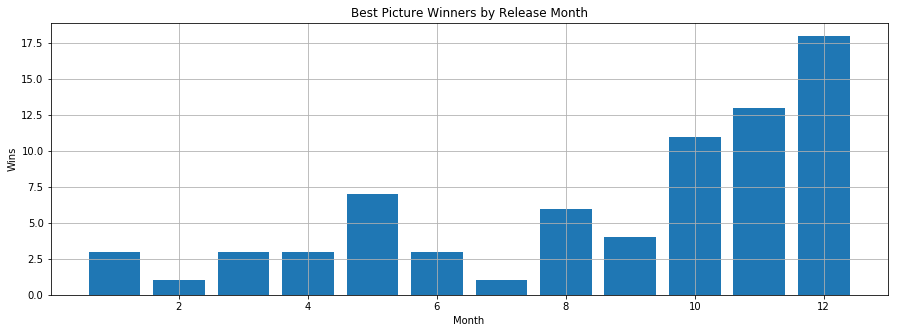

In [128]:
new_oscar_qual_db = pd.read_csv('../DataSources/theMovies_qual.csv')
new_oscar_db = pd.read_csv('../DataSources/theMovies.csv')
wdb = new_oscar_qual_db[new_oscar_qual_db['Best Picture']==1]

releaseMonth = wdb['Release_Date'].value_counts()
month = wdb['Release_Date'].value_counts().index

plt.figure(figsize=(15,5))
winningMonthReleasePlot = plt.bar(month, releaseMonth)

plt.xlabel('Month')
plt.ylabel('Wins')
plt.title('Best Picture Winners by Release Month')

plt.grid(True)
#plt.savefig("pyberRidesDots.png")
plt.show()

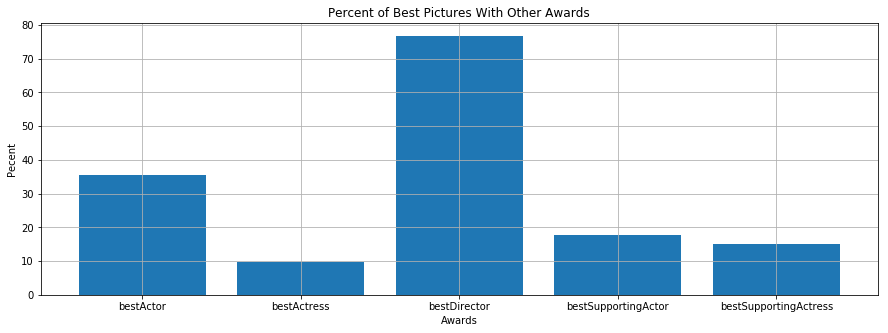

In [388]:
wdb

ba_db = new_oscar_qual_db[(new_oscar_qual_db['Best Picture']==1) & (new_oscar_qual_db['Best Actor']==1)]
bestActor = len(ba_db) / len(wdb) * 100 
bestActor = round(bestActor, 1) 

bas_db = new_oscar_qual_db[(new_oscar_qual_db['Best Picture']==1) & (new_oscar_qual_db['Best Actress']==1)]
bestActress = len(bas_db) / len(wdb) * 100
bestActress = round(bestActress, 1)

bd_db = new_oscar_qual_db[(new_oscar_qual_db['Best Picture']==1) & (new_oscar_qual_db['Best Director']==1)]
bestDirector = len(bd_db) / len(wdb) * 100
bestDirector = round(bestDirector, 1)

bsa_db = new_oscar_qual_db[(new_oscar_qual_db['Best Picture']==1) & (new_oscar_qual_db['Best Supporting Actor']==1)]
bestSupportingActor = len(bsa_db) / len(wdb) * 100
bestSupportingActor = round(bestSupportingActor, 1)

bsas_db = new_oscar_qual_db[(new_oscar_qual_db['Best Picture']==1) & (new_oscar_qual_db['Best Supporting Actress']==1)]
bestSupportingActress = len(bsas_db) / len(wdb) * 100
bestSupportingActress = round(bestSupportingActress, 1)

chanceOfAdditionalAwards = [bestActor, bestActress, bestDirector, bestSupportingActor, bestSupportingActress]
chanceOfAdditionalAwardsLabels = ['bestActor', 'bestActress', 'bestDirector', 'bestSupportingActor', 'bestSupportingActress']

chanceOfAdditionalAwards

plt.figure(figsize=(15,5))
chanceOfAdditionalAwardsPlot = plt.bar(chanceOfAdditionalAwardsLabels, chanceOfAdditionalAwards)

plt.xlabel('Awards')
plt.ylabel('Pecent')
plt.title('Percent of Best Pictures With Other Awards')

plt.grid(True)
#plt.savefig("pyberRidesDots.png")
plt.show()

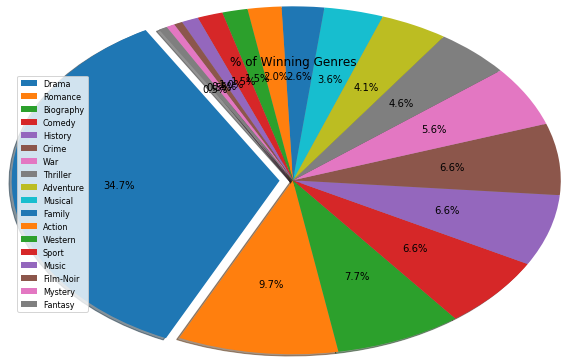

In [412]:
genreList = omdb_winners['Genre']

newGL = []
for genre in genreList:
    newG = genre.replace(" ", "").split(',')
    #genre.split(",")  
    newGL.append(newG)
newGL

genList = []
for i in range(len(newGL)):
    for j in range(len(newGL[i])):
        genList.append(newGL[i][j])

genListDF = pd.DataFrame(genList)
genreListTotals = genListDF[0].value_counts()
genreListPercentTotals = genListDF[0].value_counts() / len(genListDF[0]) * 100



# Build Pie Chart
plt.title('% of Winning Genres')
#pieColors = ['yellow', 'lightblue', 'orange']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = 'Drama', 'Romance', 'Biography', 'Comedy', 'History', 'Crime', 'War', 'Thriller', 'Adventure', 'Musical', 'Family', 'Action', 'Western', 'Sport', 'Music', 'Film-Noir', 'Mystery', 'Fantasy'
sizes = [genreListPercentTotals[0], genreListPercentTotals[1], genreListPercentTotals[2], genreListPercentTotals[3], genreListPercentTotals[4], genreListPercentTotals[5], genreListPercentTotals[6], genreListPercentTotals[7], genreListPercentTotals[8], genreListPercentTotals[9], genreListPercentTotals[10], genreListPercentTotals[11], genreListPercentTotals[12], genreListPercentTotals[13], genreListPercentTotals[14], genreListPercentTotals[15], genreListPercentTotals[16], genreListPercentTotals[17]]
plt.pie(sizes, explode=explode, shadow=True, startangle=120, radius=2, autopct='%1.1f%%')

plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)

#plt.savefig("pyberFaresPie.png")
plt.show()
#genreListPercentTotals

In [362]:
finalMovieQualDB = pd.read_csv('../DataSources/theMovies_qual2.csv')
finalMovieDB = pd.read_csv('../DataSources/theMovies2.csv')

genreWinnersDF = finalMovieQualDB[finalMovieQualDB['Best Picture'] == 1]

actionTotalNoms = finalMovieQualDB['Genre_Action'].sum()
actionTotalWins = genreWinnersDF['Genre_Action'].sum()
actionTotalWinPercent = (actionTotalWins / actionTotalNoms) * 100
actionTotalWinPercent

adventureTotalNoms = finalMovieQualDB['Genre_Adventure'].sum()
adventureTotalWins = genreWinnersDF['Genre_Adventure'].sum()
adventureTotalWinPercent = (adventureTotalWins / adventureTotalNoms) * 100
adventureTotalWinPercent

animationTotalNoms = finalMovieQualDB['Genre_Animation'].sum()
animationTotalWins = genreWinnersDF['Genre_Animation'].sum()
animationTotalWinPercent = (animationTotalWins / animationTotalNoms) * 100
animationTotalWinPercent

biographyTotalNoms = finalMovieQualDB['Genre_Biography'].sum()
biographyTotalWins = genreWinnersDF['Genre_Biography'].sum()
biographyTotalWinPercent = (biographyTotalWins / biographyTotalNoms) * 100
biographyTotalWinPercent

comedyTotalNoms = finalMovieQualDB['Genre_Comedy'].sum()
comedyTotalWins = genreWinnersDF['Genre_Comedy'].sum()
comedyTotalWinPercent = (comedyTotalWins / comedyTotalNoms) * 100
comedyTotalWinPercent

crimeTotalNoms = finalMovieQualDB['Genre_Crime'].sum()
crimeTotalWins = genreWinnersDF['Genre_Crime'].sum()
crimeTotalWinPercent = (crimeTotalWins / crimeTotalNoms) * 100
crimeTotalWinPercent

documentaryTotalNoms = finalMovieQualDB['Genre_Documentary'].sum()
documentaryTotalWins = genreWinnersDF['Genre_Documentary'].sum()
documentaryTotalWinPercent = (documentaryTotalWins / documentaryTotalNoms) * 100
documentaryTotalWinPercent

dramaTotalNoms = finalMovieQualDB['Genre_Drama'].sum()
dramaTotalWins = genreWinnersDF['Genre_Drama'].sum()
dramaTotalWinPercent = (dramaTotalWins / dramaTotalNoms) * 100
dramaTotalWinPercent

familyTotalNoms = finalMovieQualDB['Genre_Family'].sum()
familyTotalWins = genreWinnersDF['Genre_Family'].sum()
familyTotalWinPercent = (familyTotalWins / familyTotalNoms) * 100
familyTotalWinPercent

fantasyTotalNoms = finalMovieQualDB['Genre_Fantasy'].sum()
fantasyTotalWins = genreWinnersDF['Genre_Fantasy'].sum()
fantasyTotalWinPercent = (fantasyTotalWins / fantasyTotalNoms) * 100
fantasyTotalWinPercent

filmNoirTotalNoms = finalMovieQualDB['Genre_Film-Noir'].sum()
filmNoirTotalWins = genreWinnersDF['Genre_Film-Noir'].sum()
filmNoirTotalWinPercent = (filmNoirTotalWins / filmNoirTotalNoms) * 100
filmNoirTotalWinPercent

historyTotalNoms = finalMovieQualDB['Genre_History'].sum()
historyTotalWins = genreWinnersDF['Genre_History'].sum()
historyTotalWinPercent = (historyTotalWins / historyTotalNoms) * 100
historyTotalWinPercent

horrorTotalNoms = finalMovieQualDB['Genre_Horror'].sum()
horrorTotalWins = genreWinnersDF['Genre_Horror'].sum()
horrorTotalWinPercent = (horrorTotalWins / horrorTotalNoms) * 100
horrorTotalWinPercent

musicTotalNoms = finalMovieQualDB['Genre_Music'].sum()
musicTotalWins = genreWinnersDF['Genre_Music'].sum()
musicTotalWinPercent = (musicTotalWins / musicTotalNoms) * 100
musicTotalWinPercent

musicalTotalNoms = finalMovieQualDB['Genre_Musical'].sum()
musicalTotalWins = genreWinnersDF['Genre_Musical'].sum()
musicalTotalWinPercent = (musicalTotalWins / musicalTotalNoms) * 100
musicalTotalWinPercent

mysteryTotalNoms = finalMovieQualDB['Genre_Mystery'].sum()
mysteryTotalWins = genreWinnersDF['Genre_Mystery'].sum()
mysteryTotalWinPercent = (mysteryTotalWins / mysteryTotalNoms) * 100
mysteryTotalWinPercent

romanceTotalNoms = finalMovieQualDB['Genre_Romance'].sum()
romanceTotalWins = genreWinnersDF['Genre_Romance'].sum()
romanceTotalWinPercent = (romanceTotalWins / romanceTotalNoms) * 100
romanceTotalWinPercent

sciFiTotalNoms = finalMovieQualDB['Genre_Sci-Fi'].sum()
sciFiTotalWins = genreWinnersDF['Genre_Sci-Fi'].sum()
sciFiTotalWinPercent = (sciFiTotalWins / sciFiTotalNoms) * 100
sciFiTotalWinPercent

shortTotalNoms = finalMovieQualDB['Genre_Short'].sum()
shortTotalWins = genreWinnersDF['Genre_Short'].sum()
shortTotalWinPercent = (shortTotalWins / shortTotalNoms) * 100
shortTotalWinPercent

sportTotalNoms = finalMovieQualDB['Genre_Sport'].sum()
sportTotalWins = genreWinnersDF['Genre_Sport'].sum()
sportTotalWinPercent = (sportTotalWins / sportTotalNoms) * 100
sportTotalWinPercent

thrillerTotalNoms = finalMovieQualDB['Genre_Thriller'].sum()
thrillerTotalWins = genreWinnersDF['Genre_Thriller'].sum()
thrillerTotalWinPercent = (thrillerTotalWins / thrillerTotalNoms) * 100
thrillerTotalWinPercent

warTotalNoms = finalMovieQualDB['Genre_War'].sum()
warTotalWins = genreWinnersDF['Genre_War'].sum()
warTotalWinPercent = (warTotalWins / warTotalNoms) * 100
warTotalWinPercent

westernTotalNoms = finalMovieQualDB['Genre_Western'].sum()
westernTotalWins = genreWinnersDF['Genre_Western'].sum()
westernTotalWinPercent = (westernTotalWins / westernTotalNoms) * 100
westernTotalWinPercent

genreDict = {
    'Action': [actionTotalWinPercent],
    'Adventure': [adventureTotalWinPercent],
    'Animation': [animationTotalWinPercent],
    'Biography': [biographyTotalWinPercent],
    'Comedy': [comedyTotalWinPercent],
    'Crime': [crimeTotalWinPercent],
    'Documentary': [documentaryTotalWinPercent],
    'Drama': [dramaTotalWinPercent],
    'Family': [familyTotalWinPercent],
    'Fantasy': [fantasyTotalWinPercent],
    'Film-Noir': [filmNoirTotalWinPercent],
    'History': [historyTotalWinPercent],
    'Horror': [horrorTotalWinPercent],
    'Music': [musicTotalWinPercent],
    'Musical': [musicalTotalWinPercent],
    'Mystery': [mysteryTotalWinPercent],
    'Romance': [romanceTotalWinPercent],
    'Sci-Fi': [sciFiTotalWinPercent],
    'Short': [shortTotalWinPercent],
    'Sport': [sportTotalWinPercent],
    'Thriller': [thrillerTotalWinPercent],
    'War': [warTotalWinPercent],
    'Western': [westernTotalWinPercent] 
}

genreDict

genreWinPercentage = pd.DataFrame(genreDict)
genreWinPercentage

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,17.391304,17.391304,0.0,19.230769,17.567568,26.0,0.0,19.318182,21.73913,4.166667,...,14.285714,40.0,4.545455,16.666667,0.0,0.0,23.076923,17.647059,24.444444,20.0


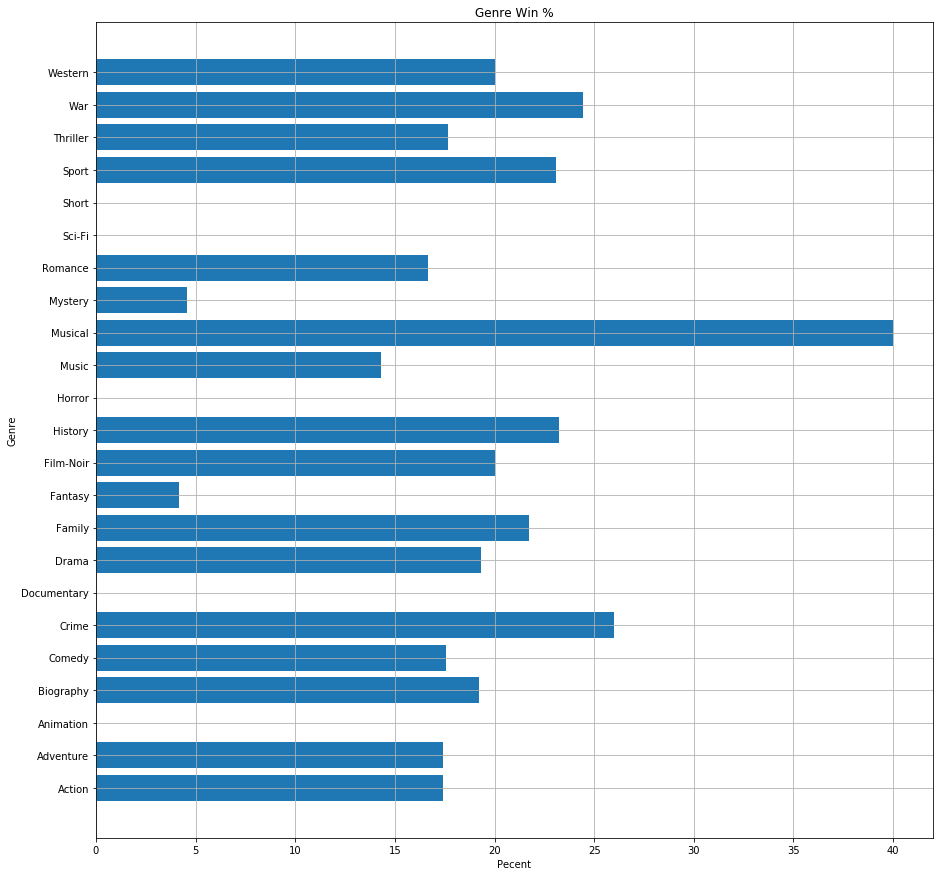

In [374]:
genreWinPercentage.iloc[0]
genreWinPercentage.columns

plt.figure(figsize=(15,15))
genreWinPercentagePlot = plt.barh(genreWinPercentage.columns, genreWinPercentage.iloc[0])

plt.ylabel('Genre')
plt.xlabel('Pecent')
plt.title('Genre Win %')

plt.grid(True)
#plt.savefig("pyberRidesDots.png")
plt.show()